In [ ]:
# 1.值范围 2.相似线段形态 3.highlight落在区间内 4.方差大

In [ ]:
import json
import uuid
branch = ['A','B','C','D','E','F','G','H','I','J','K','L']
config = {'search':[], 'insight':[], 'chart':[], 'statistic':[]}
for index in range(12):
    item = {}
    item['alias'] = 'search_branch' + str(branch[index])
    item['desc'] = 'Branch ' + str(branch[index]) + ' common use KeyValue and Mark'
    item['exp_search'] = '(txlProcBranch'+str(branch[index])+'|TxBranchCtrl'+str(branch[index])+').*(txAtt|linearization fault|external fault)'
    item['exp_extract'] = [
                        "{}[{timestamp:ti}] {}txAtt:{txAtt:d}, {}torTemperature:{torTemperature:d} {}avgIMpa0:{avgIMpa0:d} {}",
                        "{}[{timestamp:ti}] {}"
                        ]
    item['exp_mark'] = [{"alias":"LF","exp":"linearization fault","color":"#f00000"}]
    item['is_case_sensitive'] = True
    item['forward_rows'] = 0
    item['backward_rows'] = 0
    config['search'].append(item)

# for index in range(12):
#     item = {}
#     item['alias'] = 'insight_branch' + str(branch[index])
#     item['desc'] = 'Branch Insight' + str(branch[index])
#     item['exp_search'] = '(txlProcBranch'+str(branch[index])+'|TxBranchCtrl'+str(branch[index])+')'
#     item['exp_extract'] = "{}[{timestamp:ti}]{}, msg = {msg}"
#     item['exp_mark'] = {"alias":"LF","exp":"linearization fault","color":"#f00000"}
#     item['is_case_sensitive'] = True
#     item['forward_rows'] = 0
#     item['backward_rows'] = 0
#     config['insight'].append(item)

# for index in range(12):
#     item = {}
#     item['alias'] = 'statistic_branch' + str(branch[index])
#     item['desc'] = 'Branch ' + str(branch[index]) + ' statistic txAtt'
#     item['code'] = "self.result = self.text_analysis_model.alias_data['" + 'search_branch' + str(branch[index]) + "'].res_key_value['txAtt']['global_index']"
#     config['statistic'].append(item)
    
json_object = json.dumps(config)
with open("E:\\projects\\ericsson_flow\\new_files\\config.txt", "w") as outfile:
    outfile.write(json_object)

In [54]:
import json
config = {'search':[], 'insight':[], 'chart':[], 'statistic':[]}

item1 = {}
item1['alias'] = 'PackageName'
item1['desc'] = 'Elog package restart name'
item1['exp_search'] = '_R13C193'
item1['exp_extract'] = [
                    "[{tmp1}] {}LMC ID: {packname}\n[{tmp2}] {}\n[{tmp3}] {}\n[{tmp4}] {}\n[{tmp5}] {}\n[{timestamp}] {}"
                    ]
item1['exp_mark'] = []
item1['is_case_sensitive'] = True
item1['forward_rows'] = 0
item1['backward_rows'] = 5
config['search'].append(item1)

item2 = {}
item2['alias'] = 'ErrorName'
item2['desc'] = 'ABN: raiseFaultAndRollback'
item2['exp_search'] = 'ABN: raiseFaultAndRollback'
item2['exp_extract'] = [
                    "[{timestamp}] {}ABN: {errorname} {}"
                    ]
item2['exp_mark'] = []
item2['is_case_sensitive'] = True
item2['forward_rows'] = 0
item2['backward_rows'] = 0
config['search'].append(item2)

json_object = json.dumps(config)
with open("D:\\projects\\ericsson_flow\\new_files\\cooper_config.txt", "w") as outfile:
    outfile.write(json_object)

In [ ]:
import re
from parse import parse

str1 = 'BXP_3: [2022-11-23 22:04:44.572174570] (+0.000333470) radio6626 com_ericsson_trithread:INFO: { cpu_id = 1 }, { process = "txlProcBranchB", fileAndLine = "dpdController.cc:1887", msg = "txAtt:289, txAttPeak:0, dpGainLoopEnable:true, dpGainCtrlType:DSA_AD_TXFE, torTemperature:495 (0.1C), torGainBackoff:0 (0.01dB), torGainLin:3.49543(0.01dB), torStepBit:6, cc0Ctrl1=0x00000118 , avgIMpa0:1980 [mAmp]" }'
str2 = 'BXP_3: [2022-12-10 15:55:26.739019220] (+0.000025340) radio6626 com_ericsson_trithread:INFO: { cpu_id = 1 }, { process = "TxBranchCtrlB", fileAndLine = "txChangeCycleHelper.cc:264", msg = "Txl branch J restart due to txL linearization fault!" }'
# str1 = "BXP_2: [221120 164014] 27: PA measured values for driver name: DpaVddSv:7; value: 26992; branch Id: 7"
# exp = "\[%{TIMESTAMP:time}\] \(%{STRING:cost}\) "
# exp = "\[%{TIMESTAMP:time}\] %{DROP:tmp}Pma:%{FLOAT:Pma0}\[%{DROP:tmp1}DpdPma:%{FLOAT:DpdPma0}\[%{DROP:tmp2}Pmb:%{FLOAT:Pmb}, TorPmb:%{FLOAT:TorPmb0}\[%{FLOAT:TorPmb1} %{FLOAT:TorPmb2}\] "
exp_search = '(txlProcBranchB|TxBranchCtrlB).*(txAtt|linearization fault)'
exp_extract = '{}[{timestamp:ti}] {}txAtt:{txAtt:d}, {}torTemperature:{torTemperature:d} {}avgIMpa0:{avgIMpa0:d} {}'
r_search = re.findall(exp_search, str1)
r_extract = parse(exp_extract, str1)
print(r_search)
print(r_extract.named)

In [34]:
from parse import parse
# str1 = [
#     "221211-00:51:48 10.69.81.43 22.0n MSRBS_NODE_MODEL_22.Q2_566.28125.116_3317 stopfile=/tmp/21234\n",
#     "coli>/fruacc/lhsh BXP_5 ts r\n",
#     "Board                     : 45.2 C\n",
#     "DcPaVdd:0                 : 57.3 C\n",
#     "DcPaVdd:1                 : 57.8 C\n",
#     "DcPaVdd:2                 : 50.1 C\n",
#     "DcPaVdd:3                 : 50.6 C\n",
#     "DcTrxVcc                  : 48.3 C\n"
# ]

st1 = ['221211-00:50:33 10.69.81.43 22.0n MSRBS_NODE_MODEL_22.Q2_566.28125.116_3317 stopfile=/tmp/21234\n', 'coli>/fruacc/lhsh BXP_5 ts r\n', 'Board                     : 33.2 C\n', 'DcPaVdd:0                 : 43.7 C\n', 'DcPaVdd:1                 : 44.3 C\n', 'DcPaVdd:2                 : 37.4 C\n', 'DcPaVdd:3                 : 37.7 C\n', 'DcTrxVcc                  : 48.9 C\n']
str2 = '\n'.join(str1)
r = parse("{timestamp} {}DcPaVdd:0                 : {temp:f} C{}", str2)
r

<Result ('10.69.81.43 22.0n MSRBS_NODE_MODEL_22.Q2_566.28125.116_3317 stopfile=/tmp/21234\n\ncoli>/fruacc/lhsh BXP_5 ts r\n\nBoard                     : 45.2 C\n\n', '\n\nDcPaVdd:1                 : 57.8 C\n\nDcPaVdd:2                 : 50.1 C\n\nDcPaVdd:3                 : 50.6 C\n\nDcTrxVcc                  : 48.3 C\n') {'timestamp': '221211-00:51:48', 'temp': 57.3}>

In [26]:
str2

'221210-12:40:51 10.69.81.43 22.0n MSRBS_NODE_MODEL_22.Q2_566.28125.116_3317 stopfile=/tmp/21234\ncoli>/fruacc/lhsh BXP_5 ts r\nBoard                     : 45.2 C\nDcPaVdd:0                 : 57.3 C\nDcPaVdd:1                 : 57.8 C\nDcPaVdd:2                 : 50.1 C\nDcPaVdd:3                 : 50.6 C\nDcTrxVcc                  : 48.3 C'

In [ ]:
import re
import json
from text_analysis import TextAnalysisModel

text_analysis_model = await TextAnalysisModel('parallel', mode = 'test')

file_path = ['D:\\Projects\\ericsson_flow\\new_files\\E55G948878_LE_SARONGGE_BXP_6_telog.log']
config_path = 'D:\\Projects\\ericsson_flow\\new_files\\config2.txt'

await text_analysis_model.file_container_model.on_new_file('', file_path)
await text_analysis_model.file_container_model.on_load_config('', config_path)

for key in text_analysis_model.alias_data.keys():
    print(key, len(text_analysis_model.alias_data[key].outlier))
    
for index, item in enumerate(text_analysis_model.alias_data['insight_branchJ'].outlier):
    if item['abnormal_type'] == 'AbnormalUpPulse':
        print(index, item['timestamp'], item['desc'], re.findall('msg = "(.*?)"', item['origin']))

In [4]:
import re
import json
from text_analysis import TextAnalysisModel

text_analysis_model = await TextAnalysisModel('parallel', mode = 'test')

file_path = ['D:\\projects\\ericsson_flow\\ELOG_READ_FULL_ENM3\\DL_BAYAHBARATCISIIH_GH.log']
config_path = 'D:\\Projects\\ericsson_flow\\new_files\\cooper_config1.txt'

await text_analysis_model.file_container_model.on_new_file('', file_path)
await text_analysis_model.file_container_model.on_load_config('', config_path)

for key in text_analysis_model.alias_data.keys():
    if 'Name' in key:
        print(key, text_analysis_model.alias_data[key].res_key_value)
    

PackageName {'tmp1': {'search_alias': 'PackageName', 'name': 'tmp1', 'type': 'str', 'global_index': [4117], 'search_index': [0], 'value': ['000101 000100'], 'timestamp': ['221030 182924']}, 'packname': {'search_alias': 'PackageName', 'name': 'packname', 'type': 'str', 'global_index': [4117], 'search_index': [0], 'value': ['CXP2030045%27_R13C193\n'], 'timestamp': ['221030 182924']}, 'tmp2': {'search_alias': 'PackageName', 'name': 'tmp2', 'type': 'str', 'global_index': [4117], 'search_index': [0], 'value': ['000101 000158'], 'timestamp': ['221030 182924']}, 'tmp3': {'search_alias': 'PackageName', 'name': 'tmp3', 'type': 'str', 'global_index': [4117], 'search_index': [0], 'value': ['221030 182423'], 'timestamp': ['221030 182924']}, 'tmp4': {'search_alias': 'PackageName', 'name': 'tmp4', 'type': 'str', 'global_index': [4117], 'search_index': [0], 'value': ['221030 182530'], 'timestamp': ['221030 182924']}, 'tmp5': {'search_alias': 'PackageName', 'name': 'tmp5', 'type': 'str', 'global_index

In [7]:
result = False
if ('packname' in text_analysis_model.alias_data['PackageName'].res_key_value) & ('errorname' in text_analysis_model.alias_data['ErrorName'].res_key_value):
    for item in text_analysis_model.alias_data['ErrorName'].res_key_value['errorname']['timestamp']:
        if text_analysis_model.alias_data['PackageName'].res_key_value['packname']['timestamp'][0] < item:
            result = True        
else:
    result = 'unknow'
result

False

In [7]:
table = self.text_analysis_model.batch_statistic_model.table
tt = table.loc[(table['BeforeError'] == True) & (table['AfterError'] == False),:]
self.result = len(tt) / len(table)

['221108 172627']

In [ ]:
self.text_analysis_model.batch_statistic_model.table.to_csv('D:\\projects\\ericsson_flow\\test.csv', index=False)

In [ ]:
self.result = False
if ('packname' in self.text_analysis_model.alias_data['PackageName'].res_key_value) & ('errorname' in self.text_analysis_model.alias_data['ErrorName'].res_key_value):
    for item in self.text_analysis_model.alias_data['ErrorName'].res_key_value['errorname']['timestamp']:
        if self.text_analysis_model.alias_data['PackageName'].res_key_value['packname']['timestamp'][0] > item:
            self.result = True        
else:
    self.result = 'unknow'

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

import en_core_web_sm
nlp = en_core_web_sm.load()

In [ ]:
def self_clean_special_symbols(text, symbol):
    for ch in ['.', '_','-']:
        if ch in text:
            text = text.replace(ch,symbol)
    text = re.sub(r'\d+', '', text)
    return re.sub(symbol+"+", symbol, text)
        
def camel_case_split(s):
    idx = list(map(str.isupper, s))
    # mark change of case
    l = [0]
    for (i, (x, y)) in enumerate(zip(idx, idx[1:])):
        if x and not y:  # "Ul"
            l.append(i)
        elif not x and y:  # "lU"
            l.append(i+1)
    l.append(len(s))
    # for "lUl", index of "U" will pop twice, have to filter that
    return [s[x:y].lower() for x, y in zip(l, l[1:]) if x < y]

special_words = set(['timeout', 'fault', 'error', 'abn', 'shutdown', 'deactivate' , 'activate'])
for index, item in enumerate(text_analysis_model.alias_data['insight_branchI'].outlier):
    if item['abnormal_type'] == 'UniquePrint':
        t = self_clean_special_symbols(item['value'], ' ')
        tmpwords = t.split(' ')
        words = []
        [words.extend(camel_case_split(word)) for word in tmpwords]
        doc = nlp(' '.join(words))
        pos = [w.pos_ for w in doc]
        flag = True if len(set(pos).intersection(set(['VERB', 'AUX']))) > 0 else False
        flag = True if len(set(words).intersection(special_words)) > 0 else flag
        if flag == True:
            print(index, flag, item['value'], re.findall('msg = "(.*?)"', item['origin']), set(pos))
#         print(index, item['abnormal_type'], item['value'], re.findall('msg = "(.*?)"', item['origin']))
        
# camel_case_split('IPaddress')
# doc = nlp("77868817us")
# print([(w.text, w.pos_) for w in doc]) 39

In [ ]:
re.sub(r'\d+', '',"hello 42 I'm a 32 string 30")

In [ ]:
doc = nlp("Training Signal sequence successfully done Activated")
print([(w.text, w.pos_) for w in doc])

In [ ]:
import re
import json
from text_analysis import TextAnalysisModel

text_analysis_model = await TextAnalysisModel('parallel', mode = 'test')

dir_path = 'D:\\projects\\ericsson_flow\\batch_test'
config = 'D:\\projects\\ericsson_flow\\new_files\\config2.txt'

await text_analysis_model.file_container_model.batch_insight_model.new(dir_path, config)

In [ ]:
text_analysis_model.file_container_model.batch_insight_model.result.loc[1, 'resOutlier']

In [ ]:
text_analysis_model.file_container_model.batch_insight_model.samples

In [ ]:
tmp = text_analysis_model.file_container_model.batch_insight_model.result
res = tmp.loc[(tmp['fileName'] == 'E55H060478_LE_JLADANSUKAHATI_CBX_PL_BXP_6_telog.log'), :].reset_index(drop=True).loc[0, :]
dict(res)

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

X = pd.DataFrame([[0,22],[0,22],[0,22],[0,255],[0,255],[0,255]])
cost =[]
for i in range(1, 4):
    KM = KMeans(n_clusters = i, max_iter = 500)
    KM.fit(X)

    # calculates squared error
    # for the clustered points
    cost.append(KM.inertia_)
    
# plot the cost against K values
plt.plot(range(1, 4), cost, color ='g', linewidth ='3')
plt.xlabel("Value of K")
plt.ylabel("Squared Error (Cost)")
plt.show() # clear the plot

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib as mpl
import matplotlib.pyplot as plt   # data visualization
import seaborn as sns             # statistical data visualization

def splita(df):
    return df['Month,#Passengers'].split(',')[0]

def splitb(df):
    return df['Month,#Passengers'].split(',')[1]
    
path = 'AirPassengers.csv'
df = pd.read_csv(path)
df['Month'] = df.apply(splita, axis=1)
df['#Passengers'] = df.apply(splitb, axis=1)
df = df.drop(columns=['Month,#Passengers'])
df.columns = ['Date','Number of Passengers']


In [1]:
import numpy as np
import pandas as pd

data = [200 if i % 2 == 0 else 150 for i in range(100)]
data = pd.DataFrame(data, columns=['y'])
# data.loc[0:50, 'y'] = 22
# data.loc[51, 'y'] = 255
data.loc[52:100, 'y'] = 100
data = data.reset_index()
data = data.rename(columns={'index':'x'})
data

,x,y
0,0,200
1,1,150
2,2,200
3,3,150
4,4,200
...,...,...
95,95,100
96,96,100
97,97,100
98,98,100


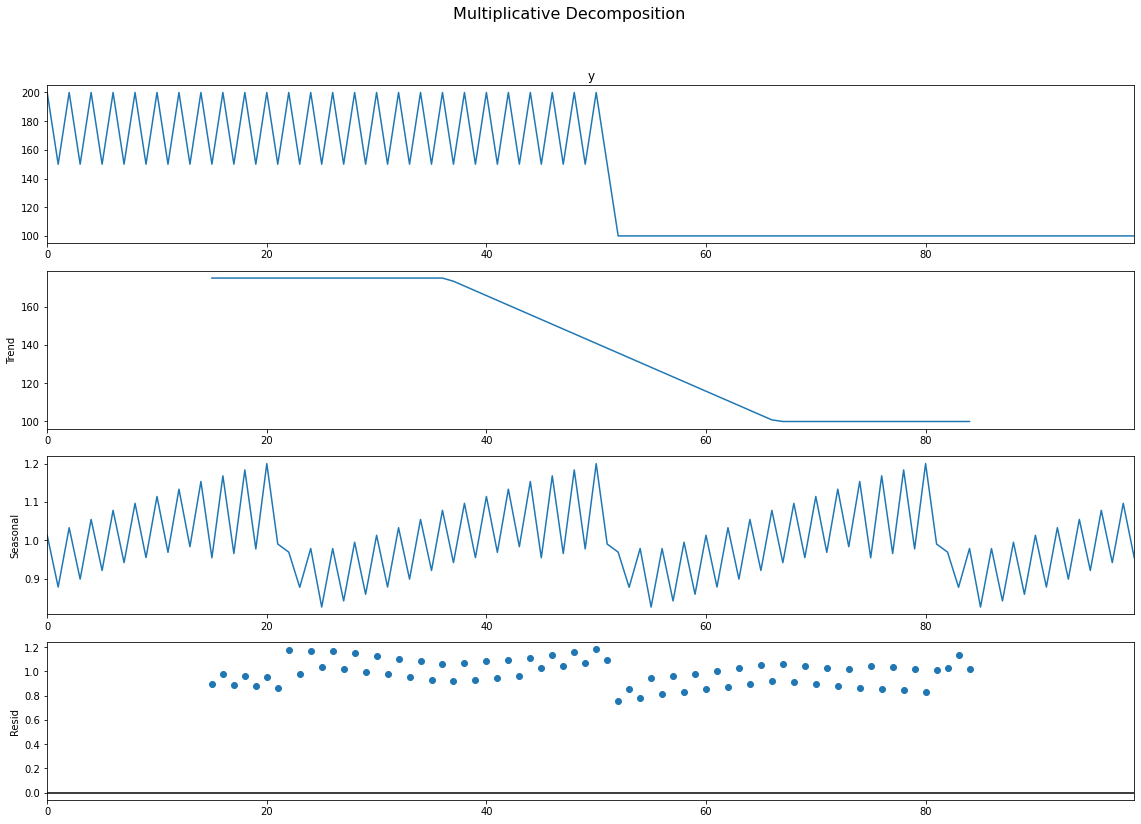

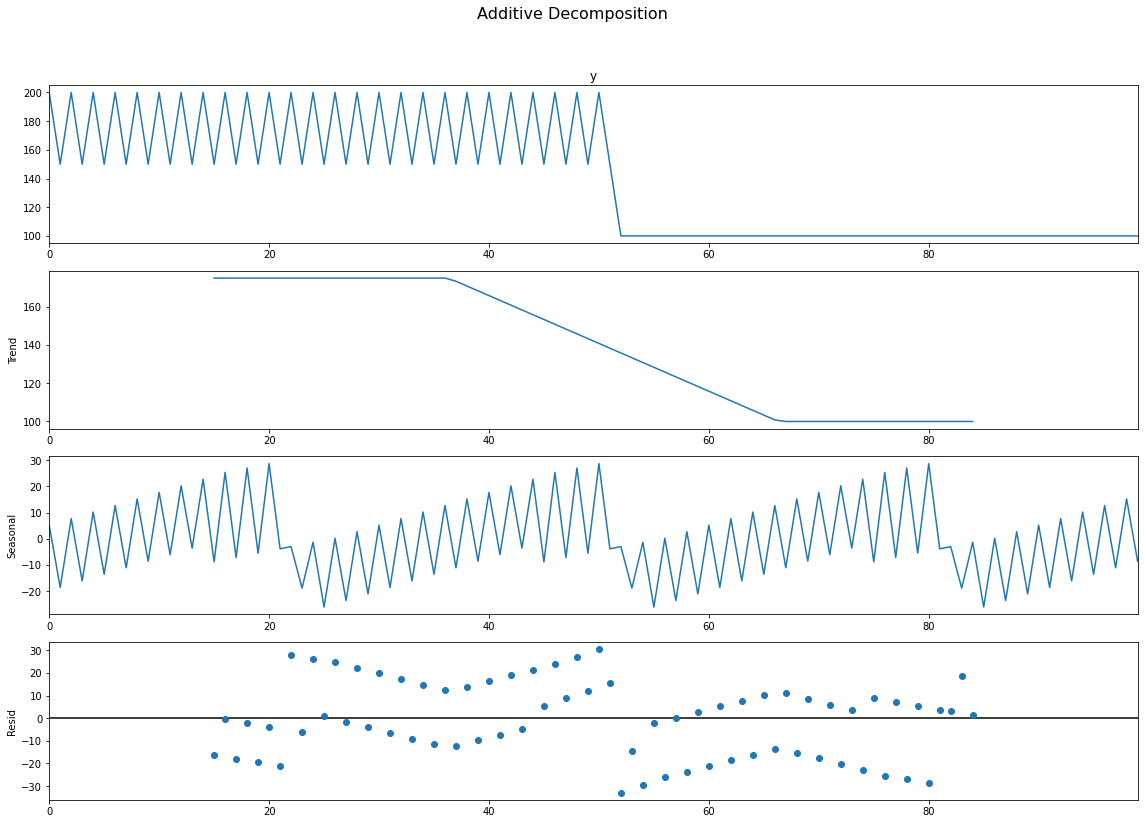

In [2]:
import statsmodels.formula.api as smapi
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

import matplotlib as mpl
import matplotlib.pyplot as plt   # data visualization
import seaborn as sns             # statistical data visualization


# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(data['y'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(data['y'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

In [3]:
res = [0 if str(i) == 'nan'  else i for i in additive_decomposition.resid]
res = pd.DataFrame(res, columns=['y'])
res = res.reset_index()
res = res.rename(columns={'index':'x'})

regression = smapi.ols("data ~ x", data=dict(data=res['y'], x=res['x'])).fit()
test = regression.outlier_test()
test[test['bonf(p)'] < 0.5]

,student_resid,unadj_p,bonf(p)


In [4]:
import socketio
sio = socketio.AsyncClient(reconnection=False)
await sio.connect('http://127.0.0.1:8000', namespaces=['/TextAnalysis/FileContainer'])
# standard Python
# sio = socketio.Client()
# sio.connect('http://127.0.0.1:8000', namespaces=['/TextAnalysis/FileContainer'])

In [5]:
await sio.emit('new_file', ['D:\\Projects\\ericsson_flow\\new_files\\E55G948878_LE_SARONGGE_BXP_6_telog.log'], namespace='/TextAnalysis/FileContainer')

In [6]:
await sio.emit('load_config', 'D:\projects\\ericsson_flow\\new_files\\config1.txt', namespace='/TextAnalysis/FileContainer')

In [7]:
sio.disconnect()

<coroutine object AsyncClient.disconnect at 0x0000010EA6F74510>

In [4]:
# await sio.disconnect
sio = socketio.AsyncClient(reconnection=False)
await sio.connect('http://127.0.0.1:8000', namespaces=['/TextAnalysis/FileContainer', '/TextAnalysis/FileContainer/LE_PELAUKAN_PL.log_BXP_5_telog.log/TextFileFunction/StatisticFunction/statistic_branchA'])

In [6]:
sio.connection_namespaces

['/TextAnalysis/FileContainer']

In [5]:
def printm(model):
    print(model)

await sio.emit('model', namespace='/TextAnalysis/FileContainer/LE_PELAUKAN_PL.log_BXP_5_telog.log/TextFileFunction/StatisticFunction/statistic_branchA', callback=printm)

{'namespace': '/TextAnalysis/FileContainer/LE_PELAUKAN_PL.log_BXP_5_telog.log/TextFileFunction/StatisticFunction/statistic_branchA', 'alias': 'statistic_branchA', 'desc': 'Branch A statistic txAtt', 'code': "self.result = self.text_analysis_model.alias_data['search_branchA'].res_key_value['txAtt']['global_index']", 'result': '[2692, 2720, 2957, 3009, 3520, 3868, 4141, 4612, 4786, 5036, 5161, 13804, 14288, 15474, 15741, 15817, 15826, 15830, 15892, 15920, 15970, 16084, 16464, 16554, 16778, 16814, 16820, 16823, 16859, 16885, 17045, 17051, 17058, 22470, 22762, 22965, 22973, 22984, 23152, 23213, 23432, 23803, 23818, 23936, 24012, 24187, 24193, 24196, 24251, 24273, 24421, 24425, 24454, 29919, 30579, 31232, 31415, 33317, 33333, 35354, 35398, 35418, 35462, 35645, 35902, 35922, 35942, 35954, 36305, 37435, 37976, 39679, 40486, 40502, 40518, 40558, 40646, 40686, 40722, 40726, 40734, 40754, 40766, 40778, 40822, 40846, 40878, 40882, 40902, 40918, 40922, 40938, 40950, 40970, 41010, 41014, 41074, 410

In [6]:
data

<coroutine object AsyncClient.emit at 0x000002768CD90580>

In [7]:
sio.emit?

Signature: sio.emit(event, data=None, namespace=None, callback=None)
Docstring:
Emit a custom event to one or more connected clients.

:param event: The event name. It can be any string. The event names
              ``'connect'``, ``'message'`` and ``'disconnect'`` are
              reserved and should not be used.
:param data: The data to send to the server. Data can be of
             type ``str``, ``bytes``, ``list`` or ``dict``. To send
             multiple arguments, use a tuple where each element is of
             one of the types indicated above.
:param namespace: The Socket.IO namespace for the event. If this
                  argument is omitted the event is emitted to the
                  default namespace.
:param callback: If given, this function will be called to acknowledge
                 the the server has received the message. The arguments
                 that will be passed to the function are those provided
                 by the server.

Note: this method is 